In [30]:
import os
instance_files = os.listdir("data/method_outputs/")
instance_files

['bur26a', 'els19', 'lipa40a', 'nug14', 'rou20', 'sko100a', 'ste36c', 'tho150']

In [2]:
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [144]:
results = []
times = []
for i in instance_files:
    method_files = os.listdir("data/method_outputs/" + i)
    for m in method_files:
        txt_files = os.listdir("data/method_outputs/" + i + "/" + m)
        for file in txt_files:
            if (file !="Time.txt"):
                path = "data/method_outputs/" + i +"/"+ m +"/"+ file
                with open(path, 'r') as f:
                    lines = f.readlines()
                    size = int(lines[0].strip()) if lines[0].strip().isdigit() else None
                    starting = int(lines[1].strip()) if lines[1].strip().isdigit() else None
                    initialSolution = list(lines[2].split(" "))
                
                    steps = int(lines[3].strip()) if lines[4].strip().isdigit() else None
                    evals = int(lines[4].strip()) if lines[4].strip().isdigit() else None
                    value = int(lines[5].strip()) if lines[5].strip().isdigit() else None
                    solution = list(lines[7].split(" "))

                    result = {
                        'method': m,
                        'instance': i,
                        'run': file.split('.')[0],
                        'size': size,
                        'steps': steps,
                        'evals': evals,
                        'f_val': value,
                        'start_val': starting,
                        'initial': initialSolution,
                        'solution': solution
                    }
                    results.append(result)
            else:
                path = "data/method_outputs/" + i +"/"+ m +"/"+ file
                with open(path, 'r') as f:
                    lines = f.readlines()
                    fullTime = []
                    for line in lines[:10]:  
                        fullTime.append(int(line.strip()))
                    bestCost = int(lines[10].strip())
                    bestSol = list(lines[11].split(" "))

                    time = {
                        'method':m,
                        'instance': i,
                        'bestFit': bestCost,
                        'bestSol': bestSol,
                        'time': fullTime,
                    }
                    times.append(time)

        

    

In [59]:
print(results[300])

{'method': 'RandomSearch', 'instance': 'rou20', 'run': '1', 'size': 20, 'steps': 54, 'evals': 54, 'f_val': 829968, 'start_val': 884948, 'initial': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '\n'], 'solution': ['19', '7', '18', '12', '6', '11', '0', '15', '2', '9', '1', '14', '4', '10', '8', '5', '3', '17', '16', '13', '']}


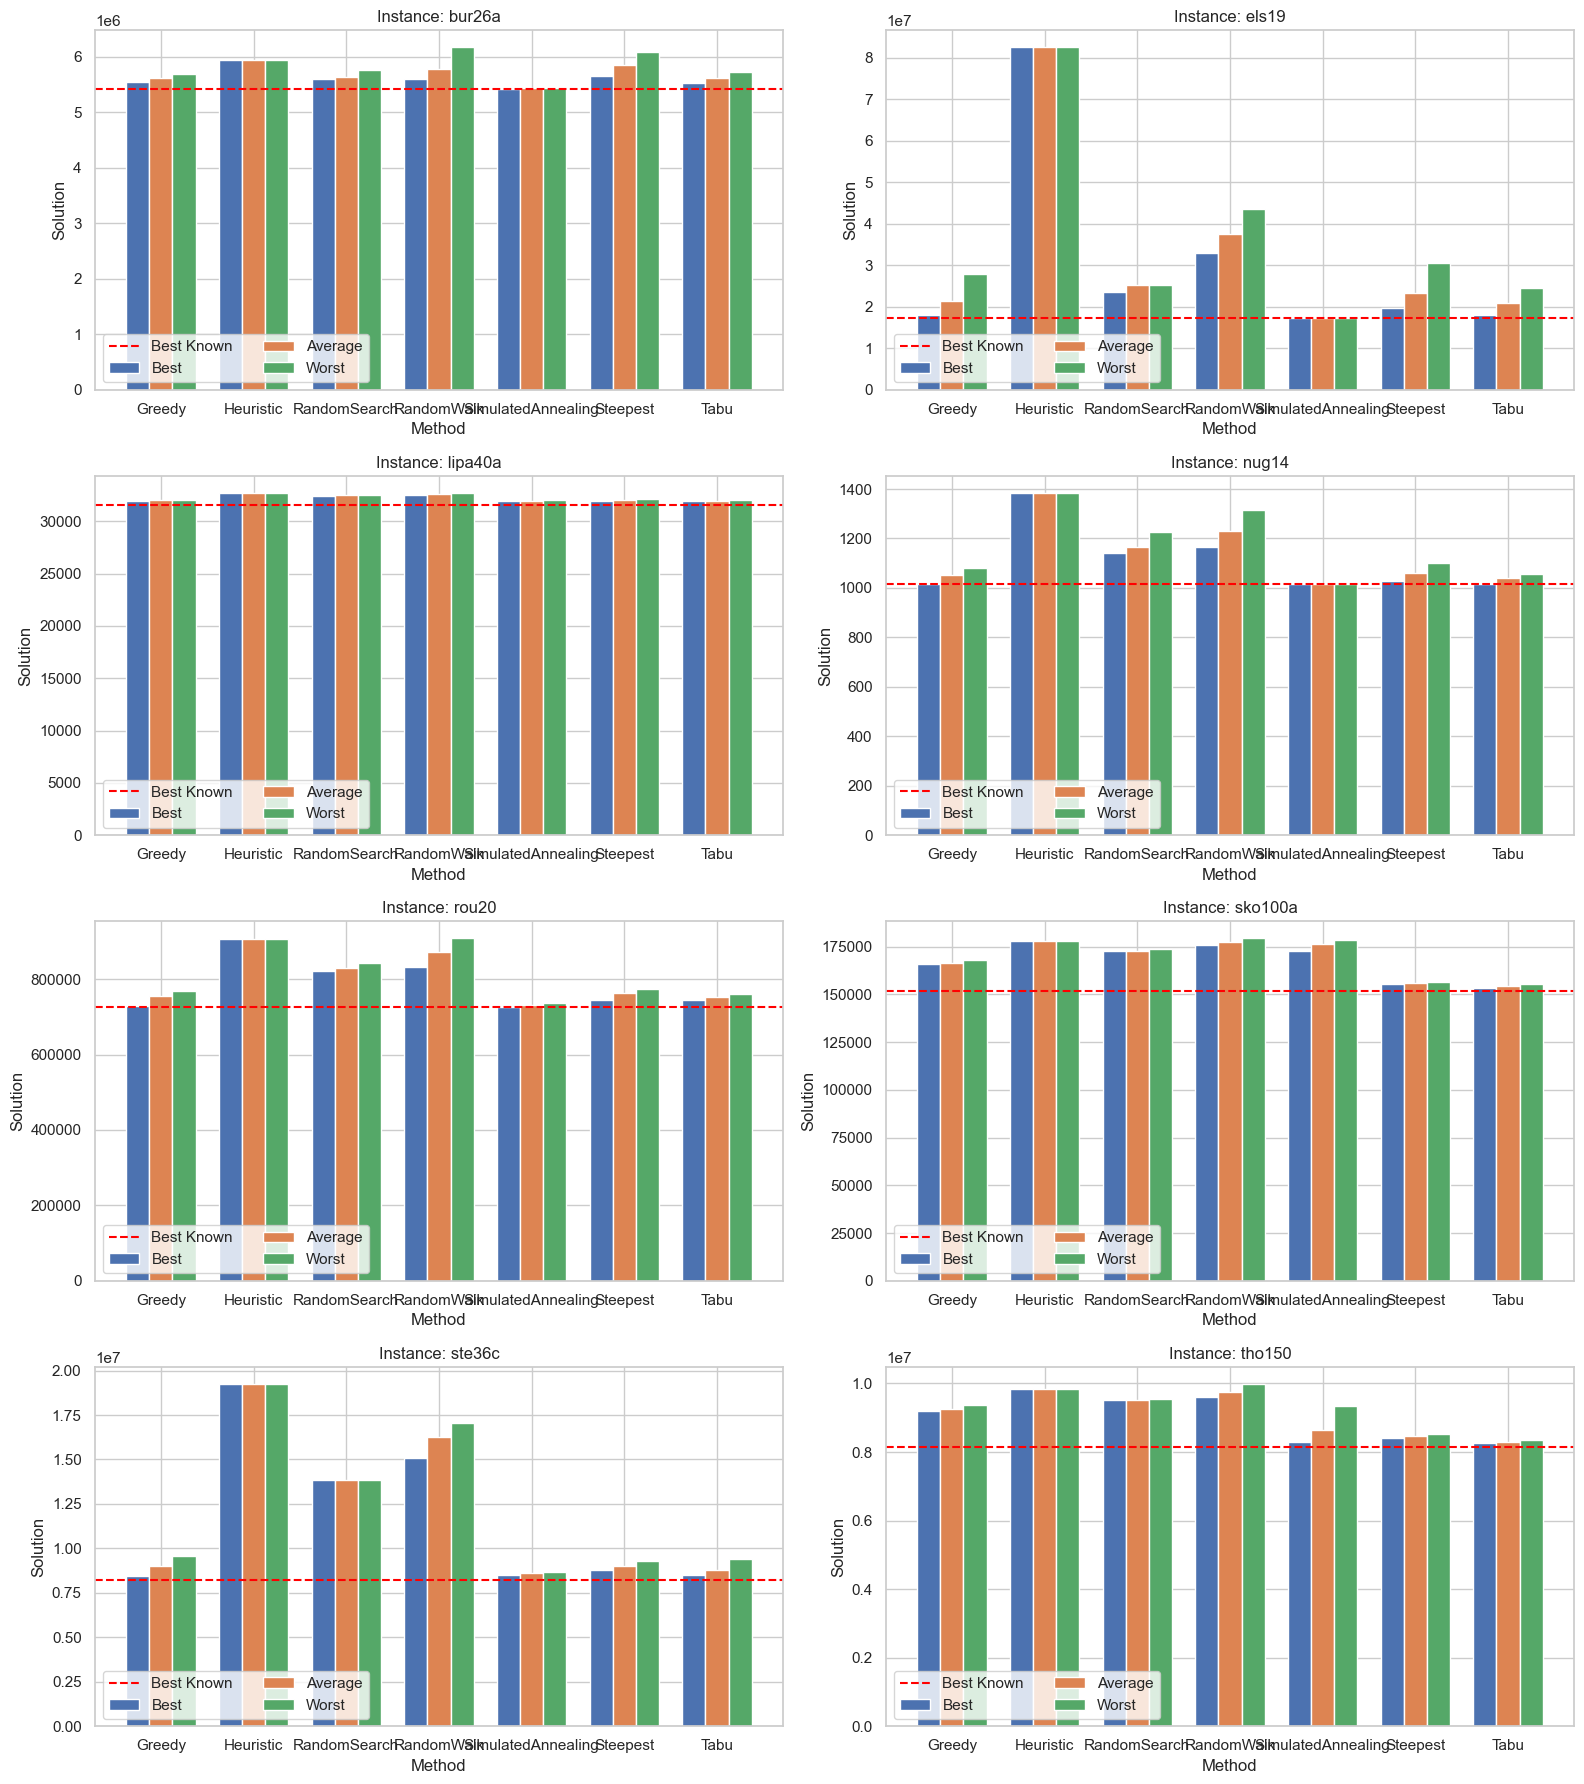

In [60]:
data = defaultdict(lambda: defaultdict(list))
best_fit = [x["bestFit"] for x in times]
for entry in results:
    method = entry["method"]
    instance = entry["instance"]
    solution = entry["f_val"]
    data[instance][method].append(solution)


# Plotting
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(4, 2, figsize=(16, 18))  # 8 instances = 4 rows x 2 cols
axs = axs.flatten()

for i, (instance, methods) in enumerate(sorted(data.items())):
    methods_list = methods.keys()
    best = [min(methods[m]) for m in methods_list]
    worst = [max(methods[m]) for m in methods_list]
    avg = [np.mean(methods[m]) for m in methods_list]

    ax = axs[i]

    width = 0.25 
    multiplier = 0
    x = np.arange(len(methods_list))
    labels=["Best", "Average", "Worst"]

    for j, measurement in enumerate([best, avg, worst]):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=labels[j])
        multiplier += 1

    # ax.plot(methods_list, best, marker='o', label='Best')
    # ax.plot(methods_list, worst, marker='o', label='Worst')
    # ax.plot(methods_list, avg, marker='o', label='Average')
    ax.axhline(y=best_fit[i*7], color="red", linestyle='--', label='Best Known')
    ax.set_title(f"Instance: {instance}")
    ax.set_xticks(x + width, methods_list)
    ax.set_xlabel("Method")
    ax.set_ylabel("Solution")
    ax.legend(loc='lower left', ncols=2)

plt.tight_layout()
plt.show()

In [41]:
methodOrder = ["Heuristic", "RandomSearch", "RandomWalk", "Greedy", "Steepest", "SimulatedAnnealing", "Tabu"]

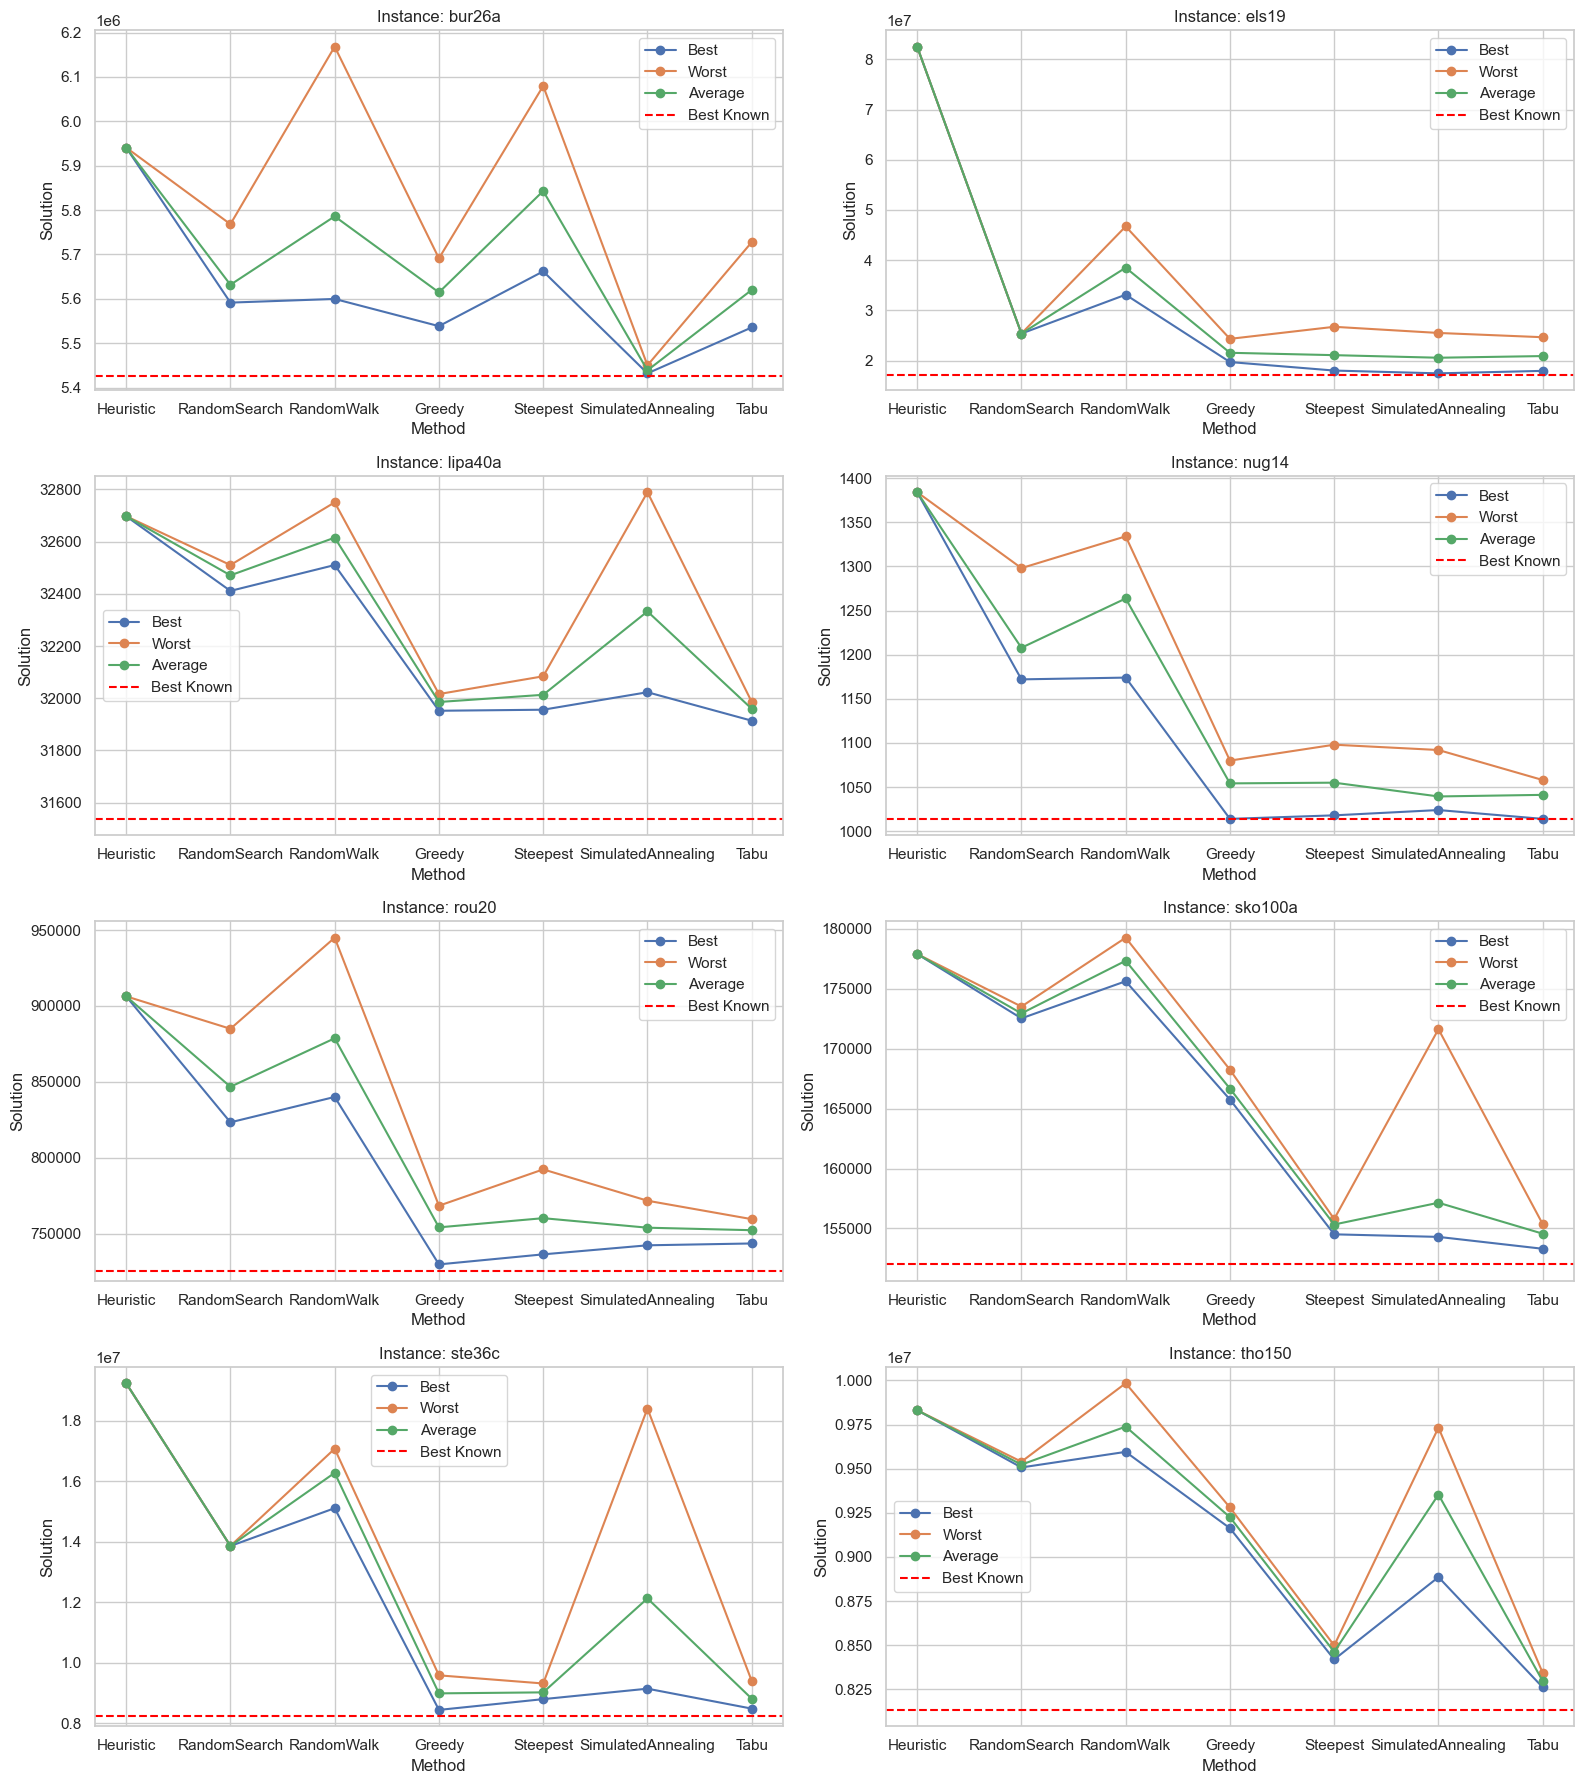

In [148]:
data = defaultdict(lambda: defaultdict(list))
best_fit = [x["bestFit"] for x in times]
for entry in results:
    method = entry["method"]
    instance = entry["instance"]
    solution = entry["f_val"]
    data[instance][method].append(solution)


# Plotting
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(4, 2, figsize=(16, 18))  # 8 instances = 4 rows x 2 cols
axs = axs.flatten()

for i, (instance, methods) in enumerate(sorted(data.items())):
    methods_list = [m for m in methodOrder if m in methods]
    best = [min(methods[m]) for m in methods_list]
    worst = [max(methods[m]) for m in methods_list]
    avg = [np.mean(methods[m]) for m in methods_list]

    ax = axs[i]

    ax.plot(methods_list, best, marker='o', label='Best')
    ax.plot(methods_list, worst, marker='o', label='Worst')
    ax.plot(methods_list, avg, marker='o', label='Average')
    ax.axhline(y=best_fit[i*7], color="red", linestyle='--', label='Best Known')
    ax.set_title(f"Instance: {instance}")
    ax.set_xlabel("Method")
    ax.set_ylabel("Solution")
    ax.legend()

plt.tight_layout()
plt.show()

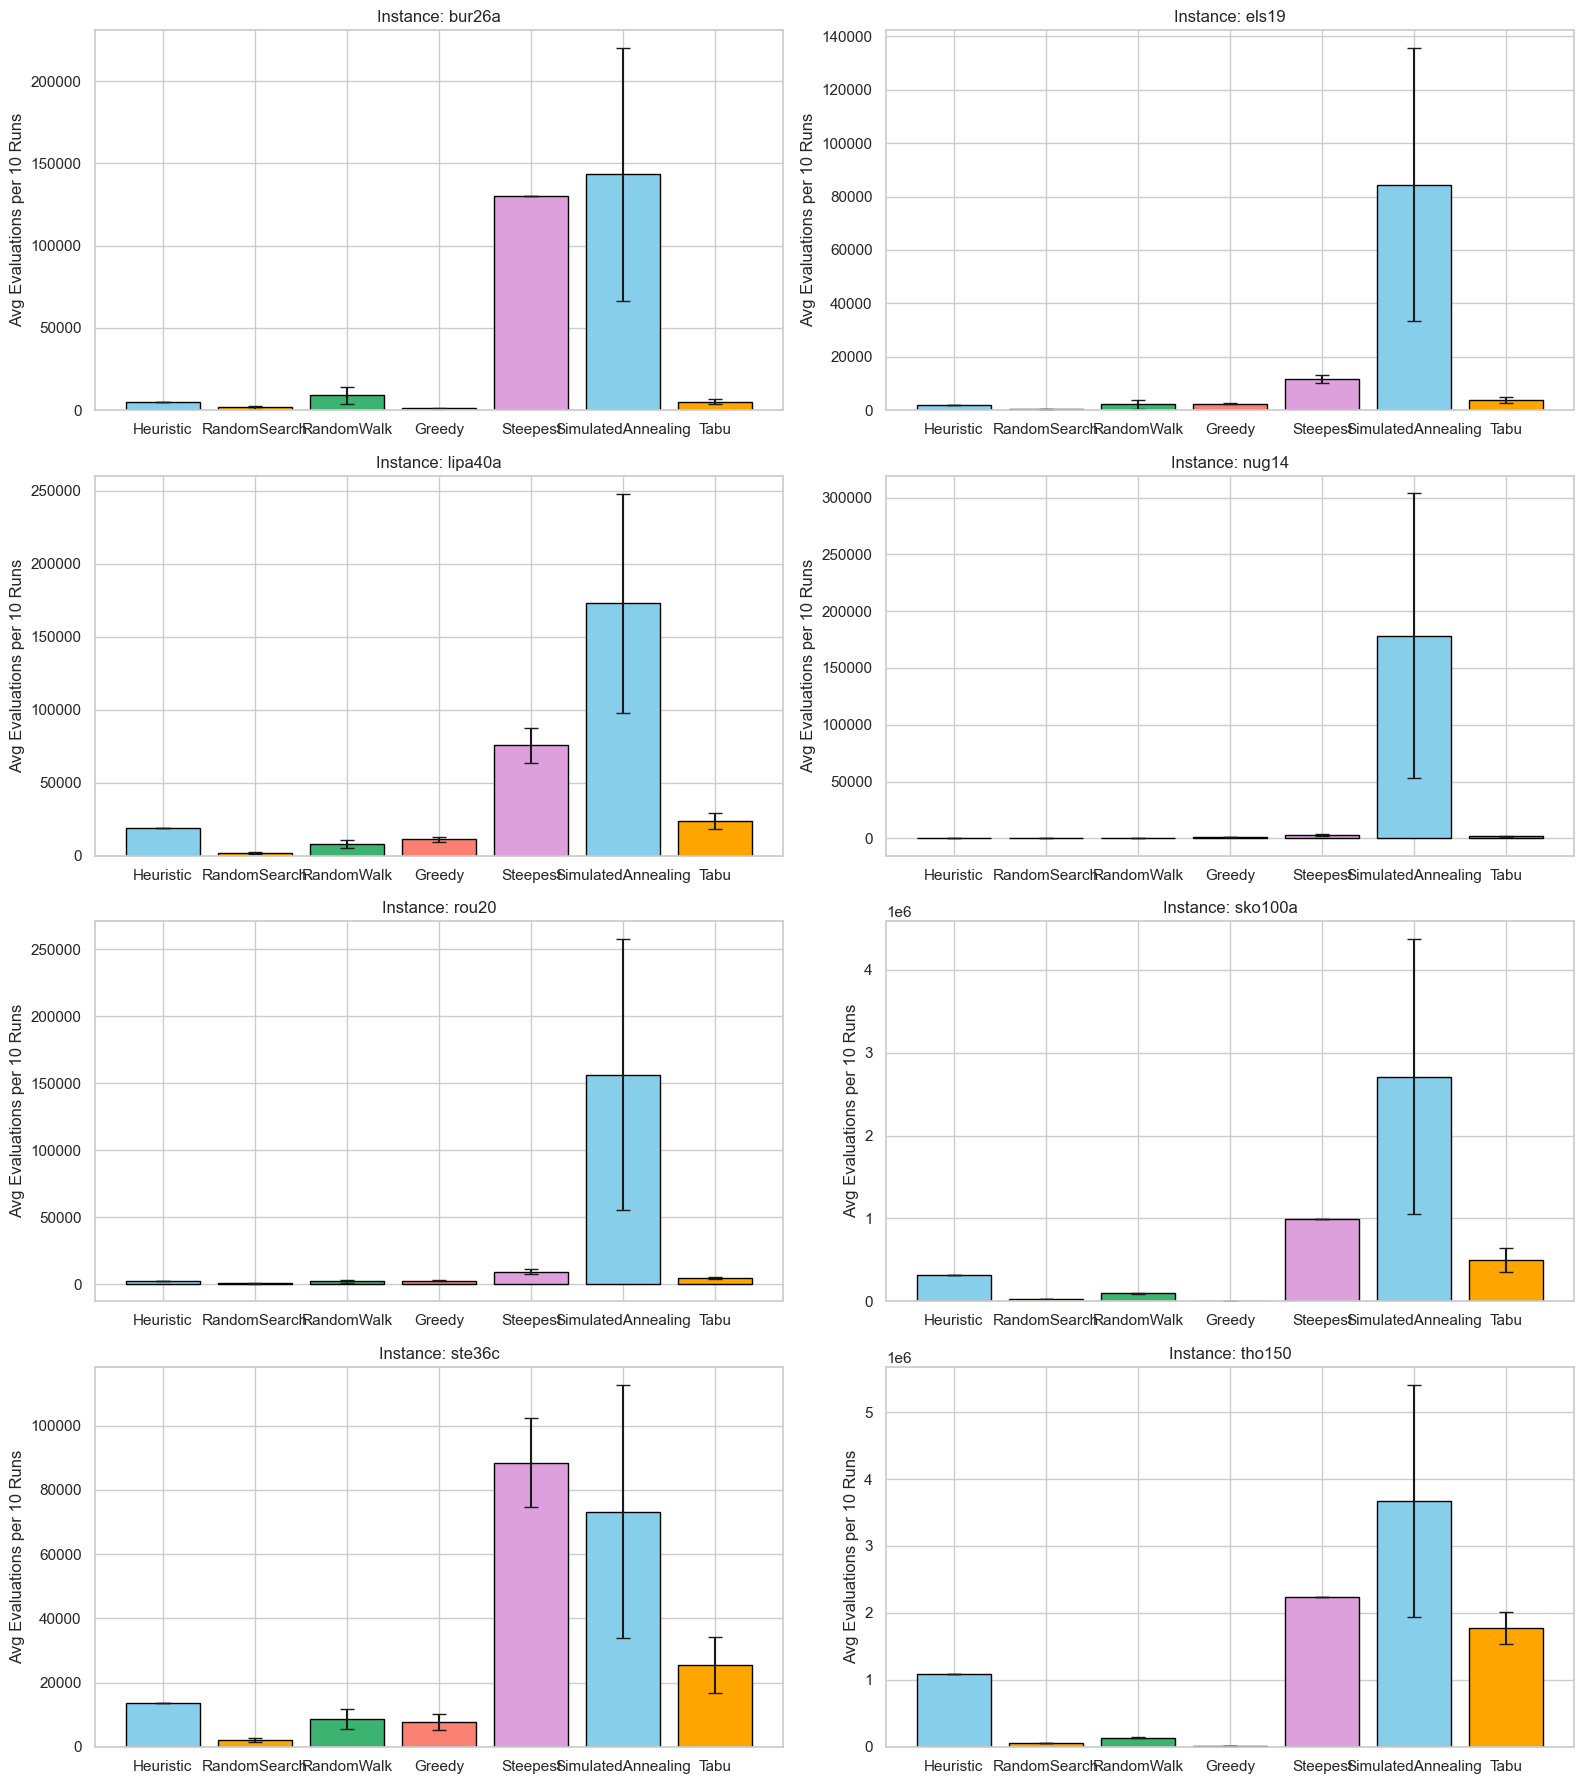

In [149]:
step_data = defaultdict(lambda: defaultdict(list)) 
for entry in results:
    inst = entry["instance"]
    method = entry["method"]
    steps = entry["evals"]
    if steps is not None:
        step_data[inst][method].append(steps)

colors = ["skyblue","orange","mediumseagreen","salmon","plum"]

# Set up plots: 8 instances = 4 rows x 2 columns
fig, axs = plt.subplots(4, 2, figsize=(16, 18))
axs = axs.flatten()

for i, (instance, methods) in enumerate(sorted(step_data.items())):
    methods_list = [m for m in methodOrder if m in methods]
    avg_steps = [np.mean(methods[m]) for m in methods_list]
    std_steps = [np.std(methods[m]) for m in methods_list]

    # Create a bar plot for steps with error bars for stability (std deviation)
    ax = axs[i]
    ax.bar(methods_list, avg_steps, yerr=std_steps, capsize=5, color=colors, edgecolor='black', label='Steps')
    
    ax.set_title(f"Instance: {instance}")
    ax.set_ylabel("Avg Evaluations per 10 Runs")

# Hide unused subplots if < 8
for j in range(i + 1, 8):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

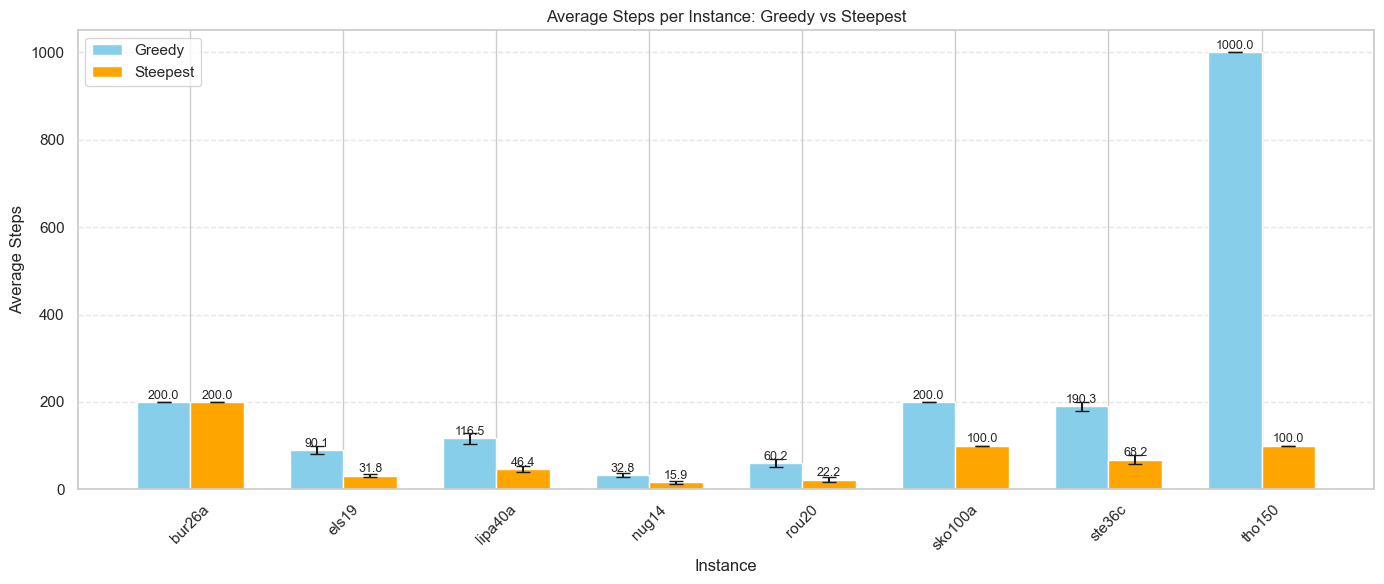

In [150]:
# Initialize step count storage
avg_steps = defaultdict(lambda: {"Greedy": [], "Steepest": []})

# Group steps by instance and method
for entry in results:
    instance = entry["instance"]
    method = entry["method"]
    steps = entry.get("steps")

    if steps is not None and method in ["Greedy", "Steepest"]:
        avg_steps[instance][method].append(steps)

# Prepare data for plotting
instances = sorted(avg_steps.keys())
greedy_avg = [np.mean(avg_steps[inst]["Greedy"]) if avg_steps[inst]["Greedy"] else 0 for inst in instances]
steepest_avg = [np.mean(avg_steps[inst]["Steepest"]) if avg_steps[inst]["Steepest"] else 0 for inst in instances]
greedy_std = [np.std(avg_steps[inst]["Greedy"]) if avg_steps[inst]["Greedy"] else 0 for inst in instances]
steepest_std = [np.std(avg_steps[inst]["Steepest"]) if avg_steps[inst]["Steepest"] else 0 for inst in instances]


x = np.arange(len(instances))
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - bar_width/2, greedy_avg, yerr=greedy_std, capsize=5, width=bar_width, label='Greedy', color='skyblue')
bars2 = ax.bar(x + bar_width/2, steepest_avg, yerr=steepest_std, capsize=5, width=bar_width, label='Steepest', color='orange')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9
        )

add_labels(bars1)
add_labels(bars2)

ax.set_xlabel("Instance")
ax.set_ylabel("Average Steps")
ax.set_title("Average Steps per Instance: Greedy vs Steepest")
ax.set_xticks(x)
ax.set_xticklabels(instances, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


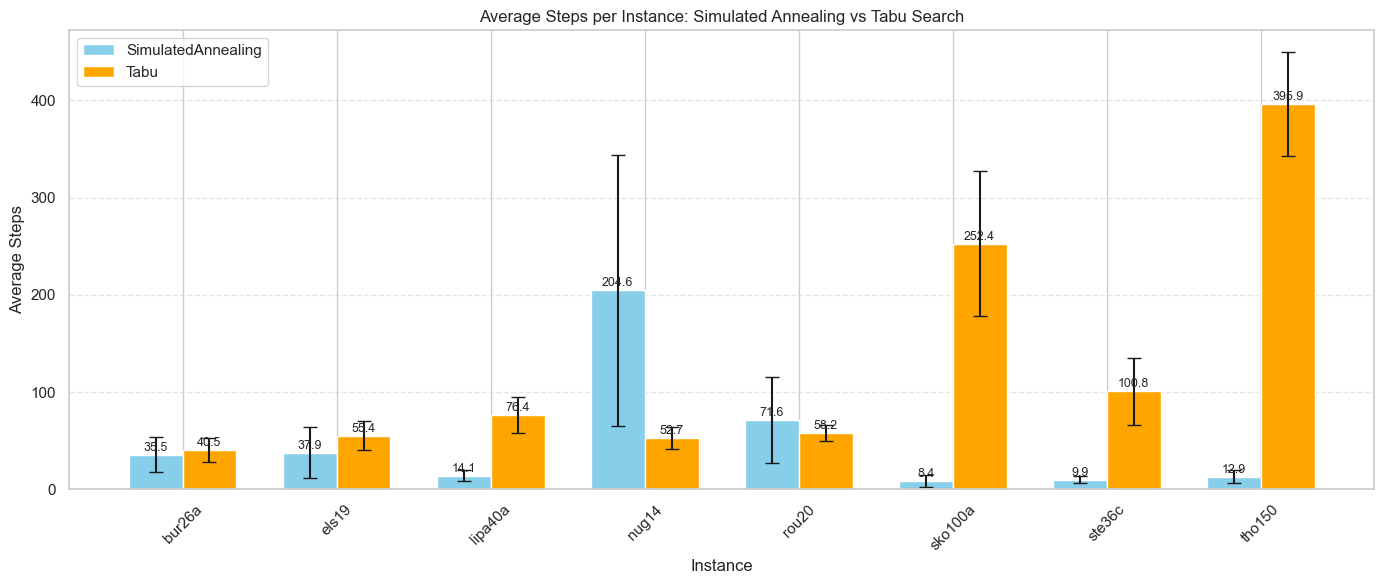

In [151]:
# Initialize step count storage
avg_steps = defaultdict(lambda: {"SimulatedAnnealing": [], "Tabu": []})

# Group steps by instance and method
for entry in results:
    instance = entry["instance"]
    method = entry["method"]
    steps = entry.get("steps")

    if steps is not None and method in ["SimulatedAnnealing", "Tabu"]:
        avg_steps[instance][method].append(steps)

# Prepare data for plotting
instances = sorted(avg_steps.keys())
greedy_avg = [np.mean(avg_steps[inst]["SimulatedAnnealing"]) if avg_steps[inst]["SimulatedAnnealing"] else 0 for inst in instances]
steepest_avg = [np.mean(avg_steps[inst]["Tabu"]) if avg_steps[inst]["Tabu"] else 0 for inst in instances]
greedy_std = [np.std(avg_steps[inst]["SimulatedAnnealing"]) if avg_steps[inst]["SimulatedAnnealing"] else 0 for inst in instances]
steepest_std = [np.std(avg_steps[inst]["Tabu"]) if avg_steps[inst]["Tabu"] else 0 for inst in instances]


x = np.arange(len(instances))
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - bar_width/2, greedy_avg, yerr=greedy_std, capsize=5, width=bar_width, label='SimulatedAnnealing', color='skyblue')
bars2 = ax.bar(x + bar_width/2, steepest_avg, yerr=steepest_std, capsize=5, width=bar_width, label='Tabu', color='orange')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9
        )

add_labels(bars1)
add_labels(bars2)

ax.set_xlabel("Instance")
ax.set_ylabel("Average Steps")
ax.set_title("Average Steps per Instance: Simulated Annealing vs Tabu Search")
ax.set_xticks(x)
ax.set_xticklabels(instances, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

['Heuristic', 'RandomSearch', 'RandomWalk', 'Greedy', 'Steepest', 'SimulatedAnnealing', 'Tabu'] [np.float64(1.8), np.float64(9.3), np.float64(9.6), np.float64(4.2), np.float64(19.6), np.float64(5.2), np.float64(6.3)]
['Heuristic', 'RandomSearch', 'RandomWalk', 'Greedy', 'Steepest', 'SimulatedAnnealing', 'Tabu'] [np.float64(2.6), np.float64(3.9), np.float64(4.2), np.float64(2.5), np.float64(3.7), np.float64(2.9), np.float64(3.4)]
['Heuristic', 'RandomSearch', 'RandomWalk', 'Greedy', 'Steepest', 'SimulatedAnnealing', 'Tabu'] [np.float64(3.2), np.float64(13.6), np.float64(14.6), np.float64(5.6), np.float64(18.0), np.float64(15.4), np.float64(12.1)]
['Heuristic', 'RandomSearch', 'RandomWalk', 'Greedy', 'Steepest', 'SimulatedAnnealing', 'Tabu'] [np.float64(1.5), np.float64(3.5), np.float64(3.5), np.float64(2.2), np.float64(2.5), np.float64(3.5), np.float64(3.2)]
['Heuristic', 'RandomSearch', 'RandomWalk', 'Greedy', 'Steepest', 'SimulatedAnnealing', 'Tabu'] [np.float64(2.7), np.float64(4.5),

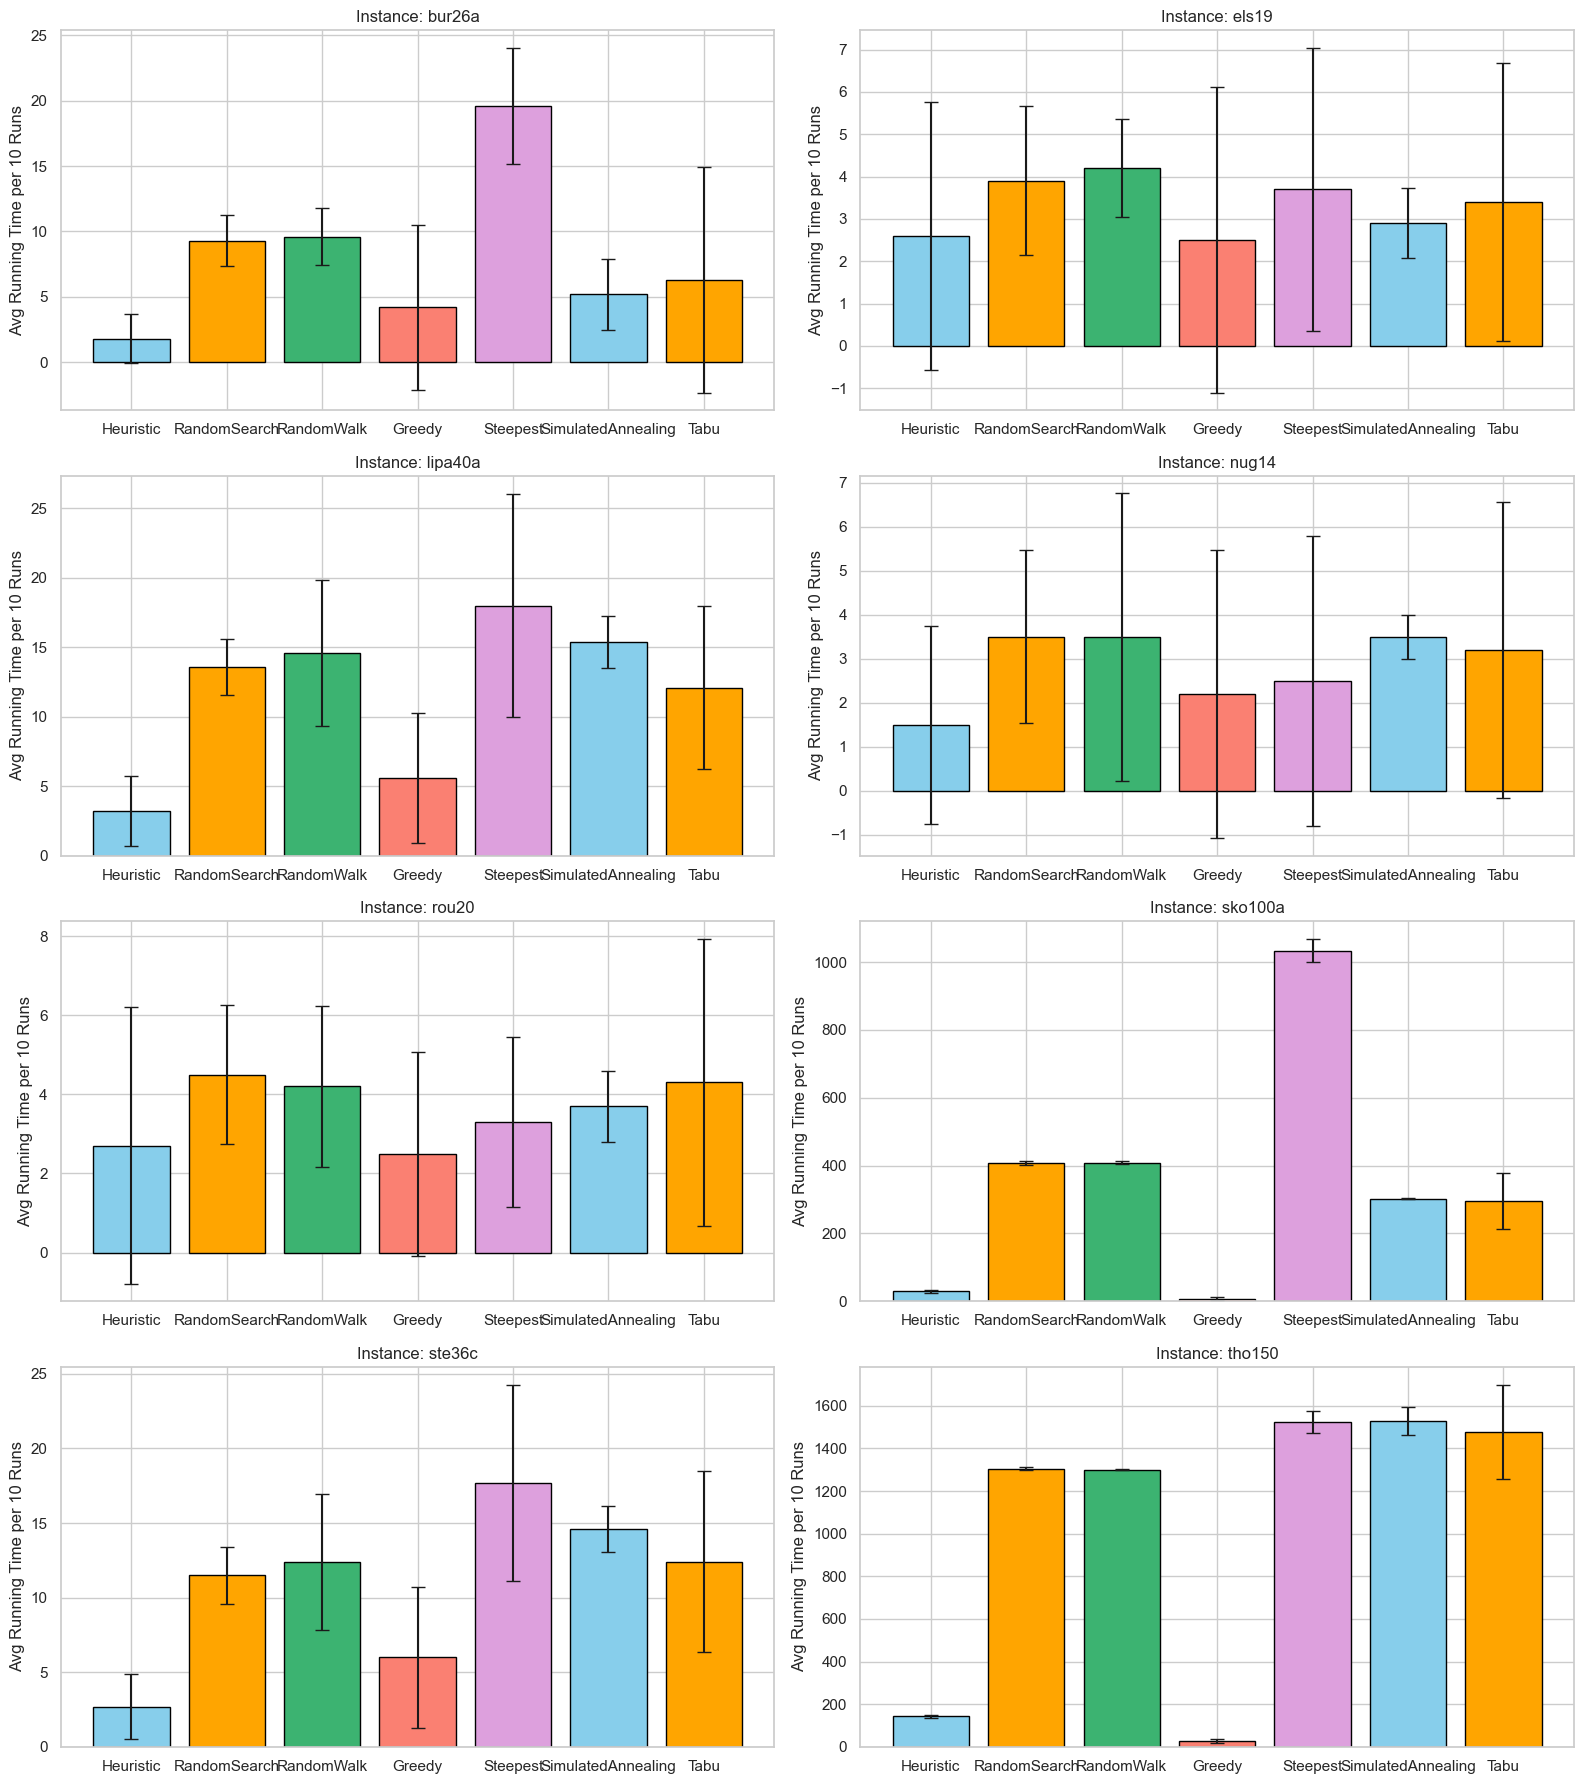

In [145]:
time_data = defaultdict(lambda: defaultdict(list)) 
for entry in times:
    inst = entry["instance"]
    method = entry["method"]
    time = entry["time"]
    if steps is not None:
        time_data[inst][method].append(time)

# Set up plots: 8 instances = 4 rows x 2 columns
fig, axs = plt.subplots(4, 2, figsize=(16, 18))
axs = axs.flatten()
instance_list = [d["instance"] for d in times if d["method"] == "Greedy"]
for i, (instance, methods) in enumerate(sorted(time_data.items())):
    methods_list = methodOrder
    avg_time =  [np.mean(methods[m]) for m in methods_list]
    std_time =  [np.std(methods[m]) for m in methods_list]
    print(methods_list, avg_time)

    # Create a bar plot for steps with error bars for stability (std deviation)
    ax = axs[i]
    ax.bar(methods_list, avg_time, yerr=std_time, capsize=5, color=colors, edgecolor='black', label='Time')
    
    ax.set_title(f"Instance: {instance_list[i]}")
    ax.set_ylabel("Avg Running Time per 10 Runs")

# Hide unused subplots if < 8
for j in range(i + 1, 8):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

C:\Users\legion\AppData\Local\Temp\ipykernel_17440\1602285967.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=instance_data, x="Method", y="Efficiency", order=methodOrder, inner="box", palette="pastel", ax=axes[i], linewidth=1.2)
C:\Users\legion\AppData\Local\Temp\ipykernel_17440\1602285967.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=instance_data, x="Method", y="Efficiency", order=methodOrder, inner="box", palette="pastel", ax=axes[i], linewidth=1.2)
C:\Users\legion\AppData\Local\Temp\ipykernel_17440\1602285967.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

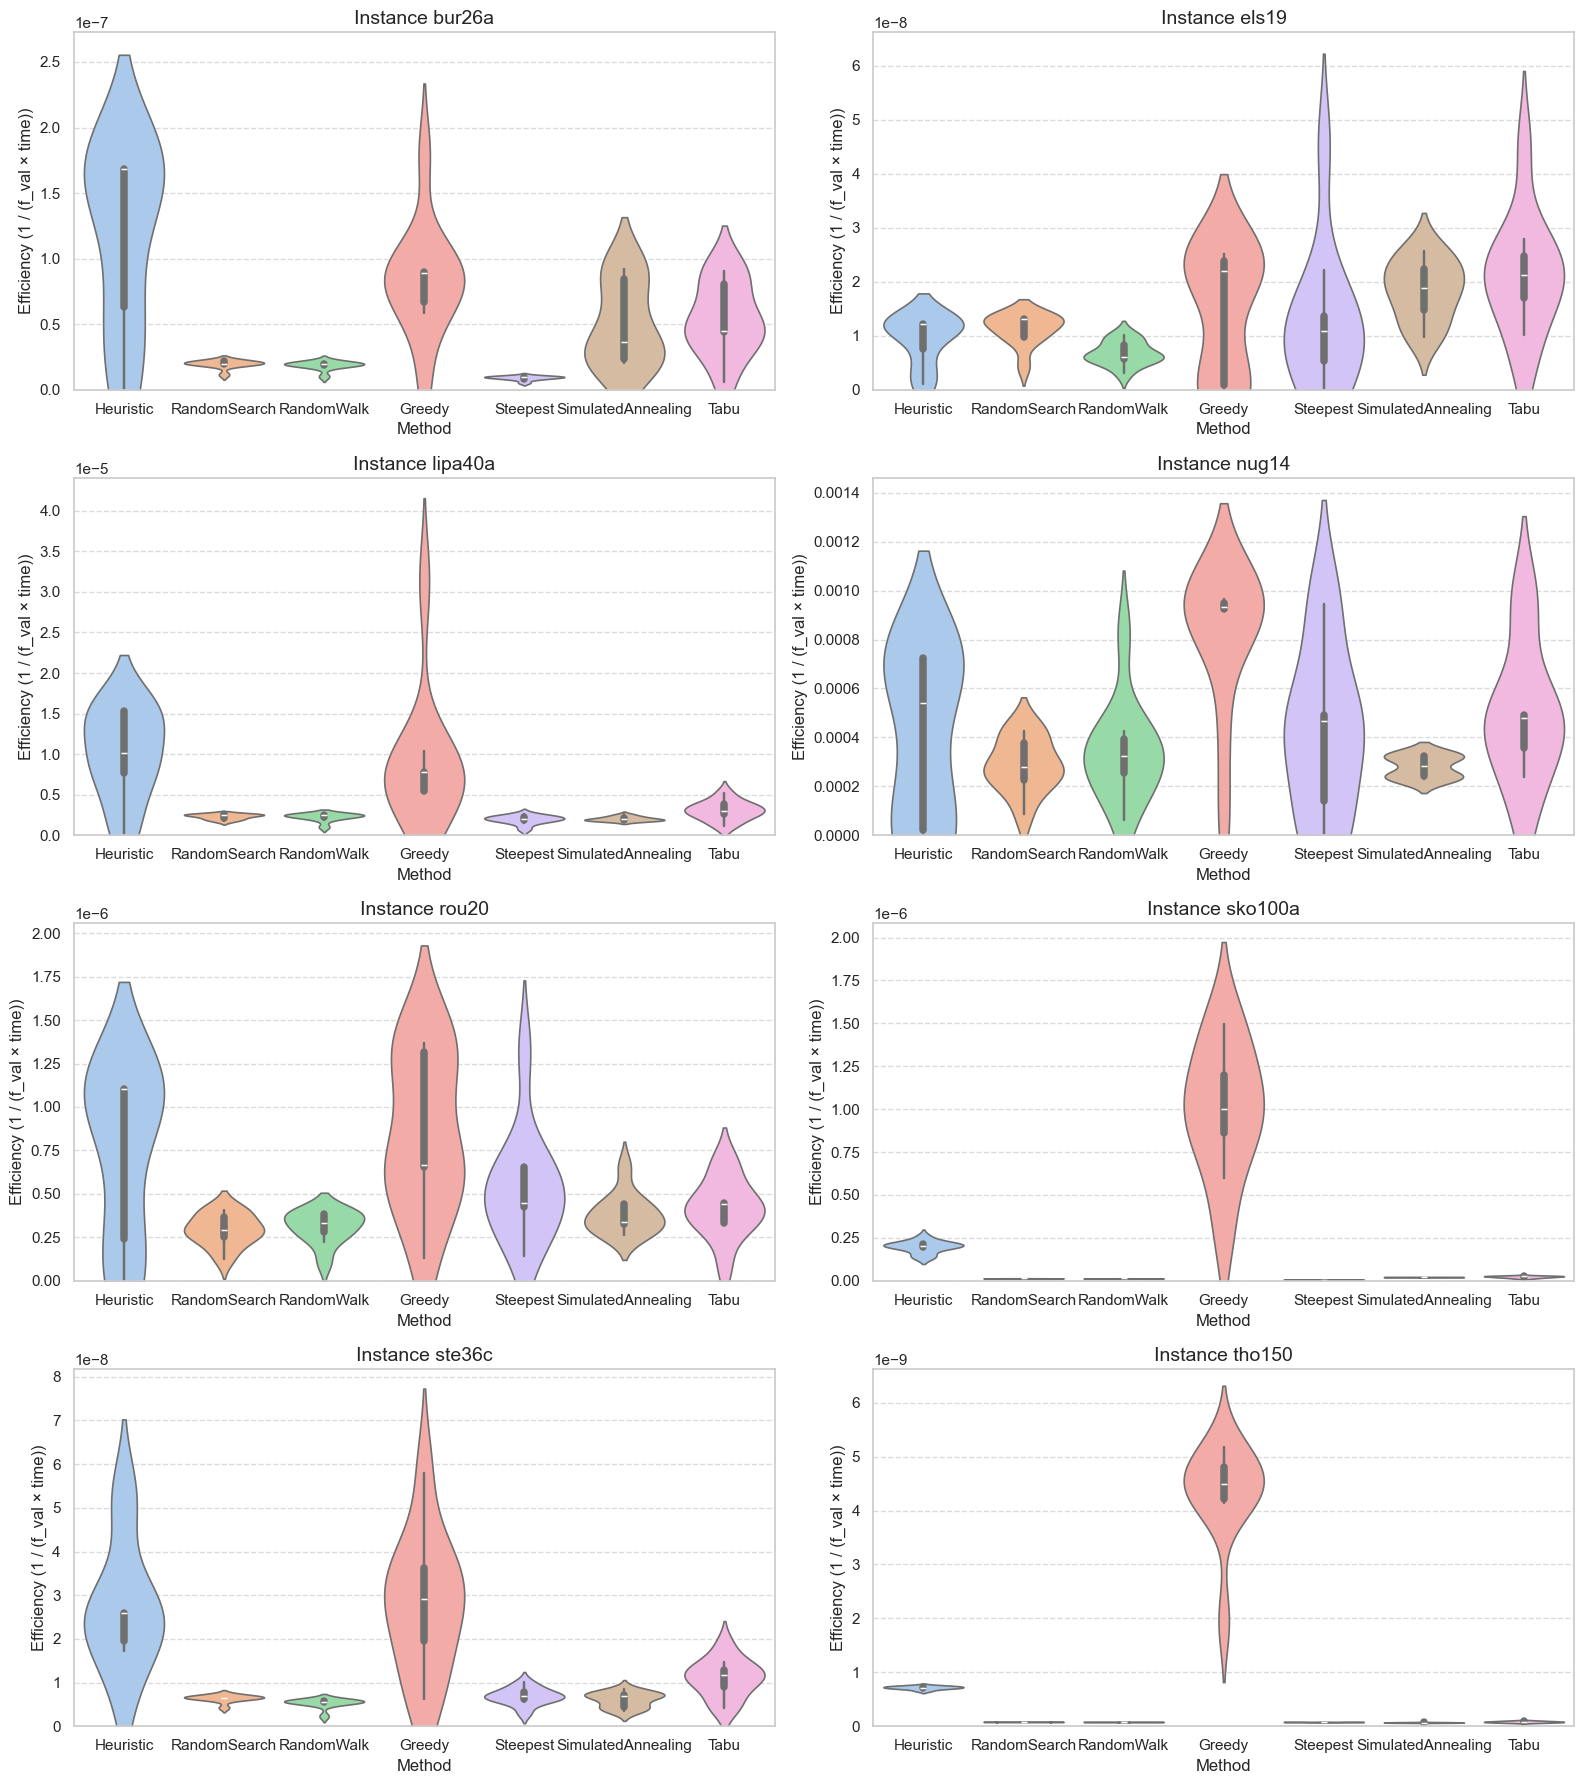

In [153]:

efficiencies = defaultdict(list)
efficiency_data = []

for entry in times:
    method = entry["method"]
    if method!="Custom":
        instance = entry["instance"]
        time = entry["time"]
        f_val = [x["f_val"] for x in results if x["method"] == method and x["instance"] == instance]

        # Avoid divide-by-zero and invalid entries
        for i, t in enumerate(time):
            efficiency = [1 / (f_val[i] * t) if t >0 else 0]
            efficiencies[method].append(efficiency[0])
            efficiency_data.append({"Method": method, "Instance": instance, "Efficiency": efficiency[0]})

df = pd.DataFrame(efficiency_data)

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot violin plots for each instance
for i, instance in enumerate(instances):
    instance_data = df[df['Instance'] == instance]  # Filter data by instance
    
    sns.violinplot(data=instance_data, x="Method", y="Efficiency", order=methodOrder, inner="box", palette="pastel", ax=axes[i], linewidth=1.2)
    
    axes[i].set_title(f"Instance {instance}", fontsize=14)
    axes[i].set_xlabel("Method")
    axes[i].set_ylabel("Efficiency (1 / (f_val × time))")
    axes[i].set_ylim(0, None)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
#plt.ylim(0, None)
plt.show()



C:\Users\legion\AppData\Local\Temp\ipykernel_17440\428944513.py:16: RuntimeWarning: invalid value encountered in scalar divide
  efficiency = [improvement / (np.log(steps[i]+1) * t) if t >0 else 0]
C:\Users\legion\AppData\Local\Temp\ipykernel_17440\428944513.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=instance_data, x="Method", y="Efficiency", order=methodOrder, inner="box", palette="pastel", ax=axes[i], linewidth=1.2)
C:\Users\legion\AppData\Local\Temp\ipykernel_17440\428944513.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=instance_data, x="Method", y="Efficiency", order=methodOrder, inner="box", palette="pastel", ax=axes[i], linewidth=1.2)
C:\Users\legion\

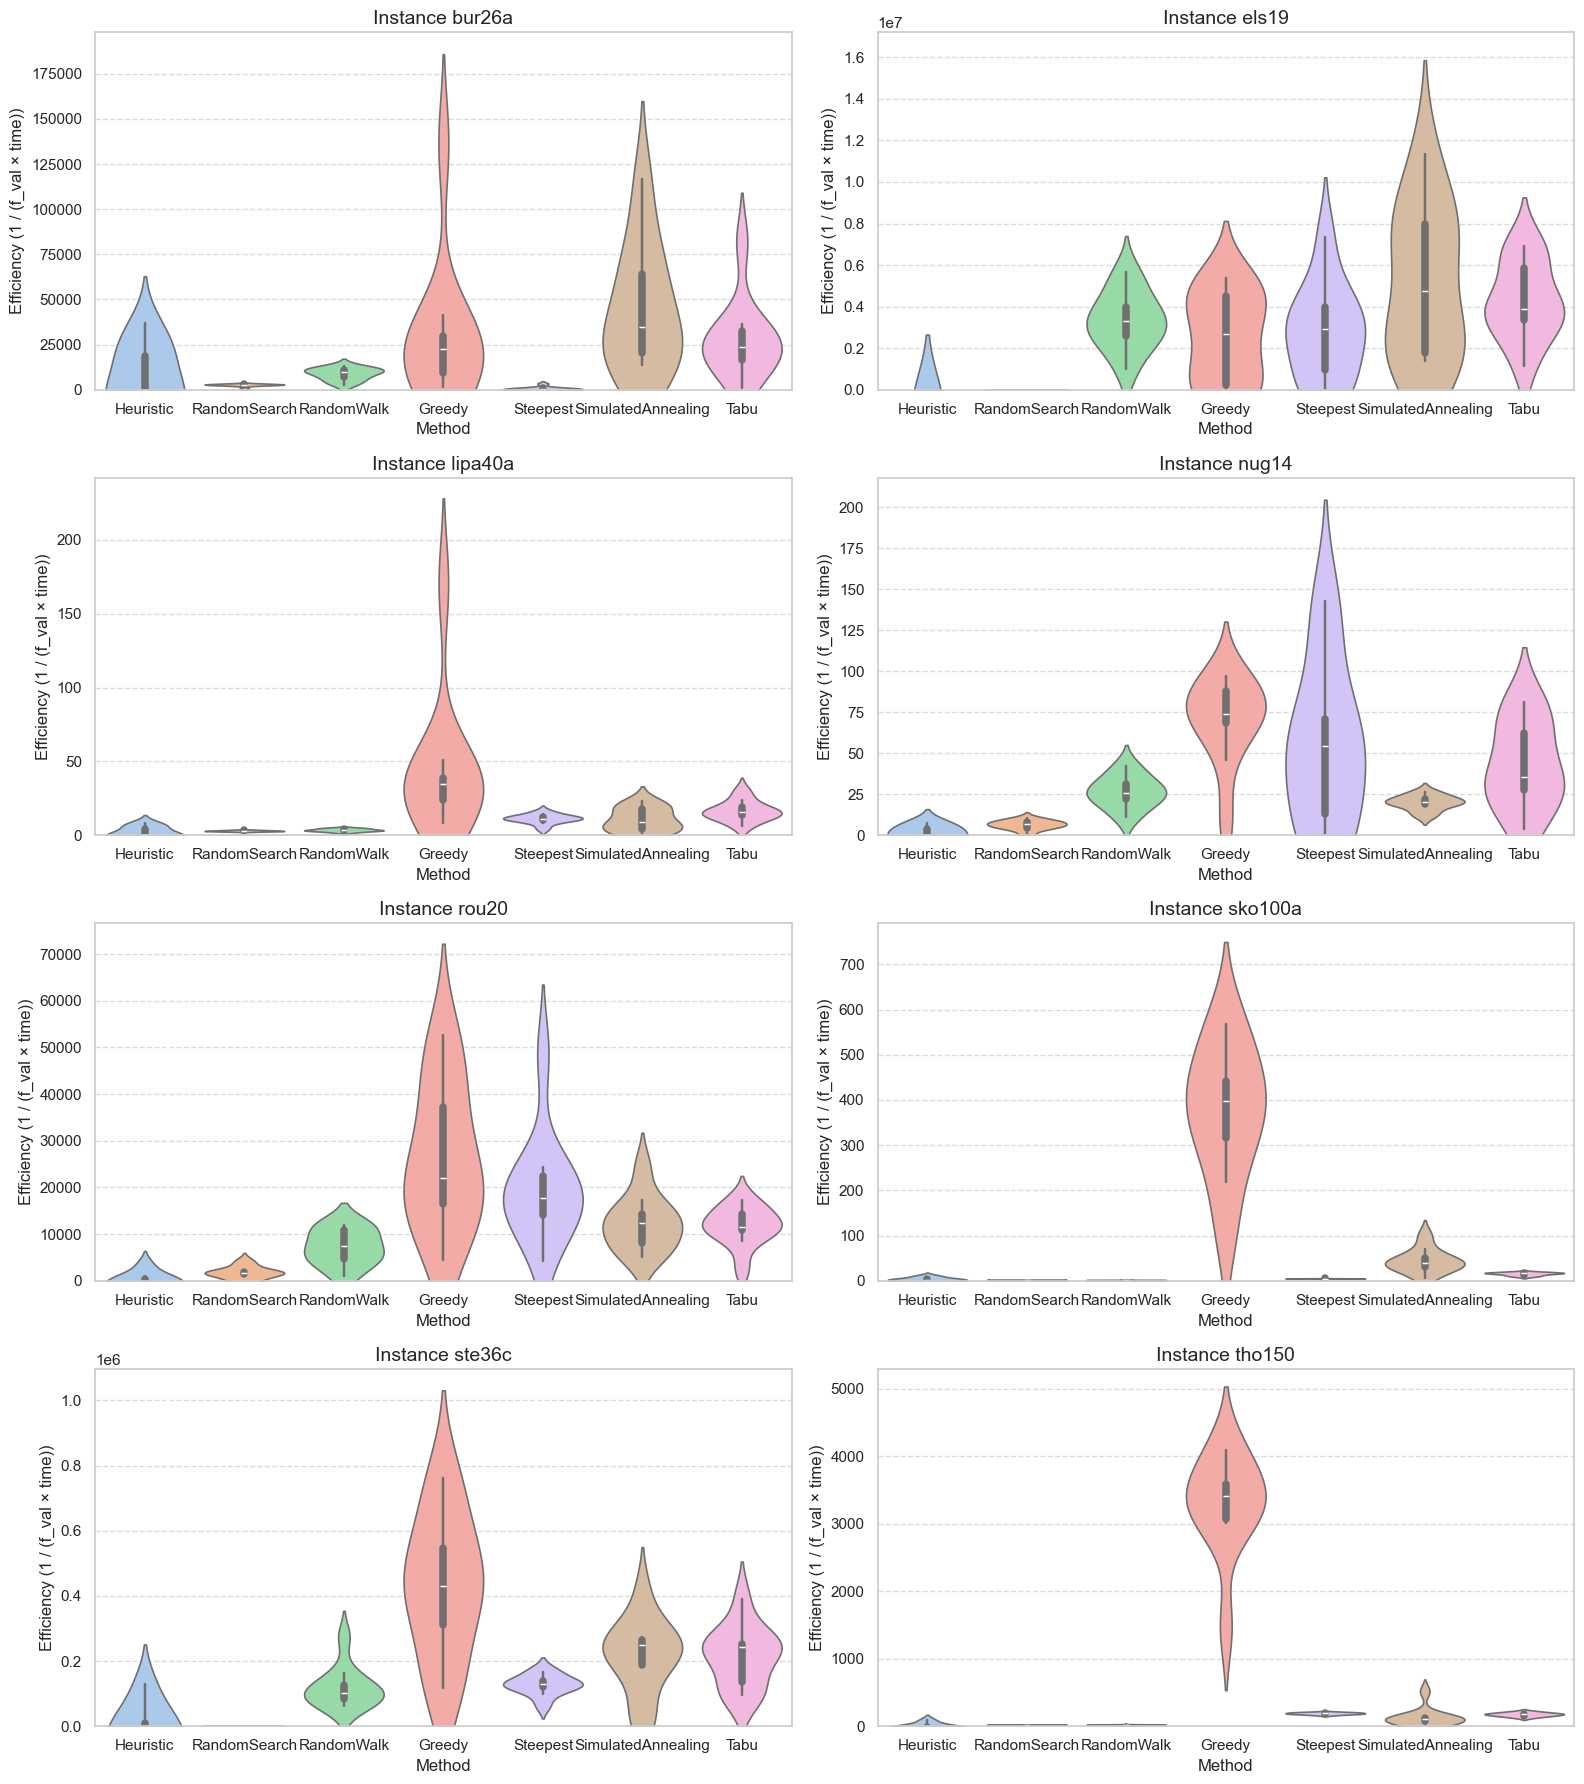

In [159]:
efficiencies = defaultdict(list)
efficiency_data2 = []

for entry in times:
    method = entry["method"]
    if method!="Custom":
        instance = entry["instance"]
        time = entry["time"]
        start_val = [x["start_val"] for x in results if x["method"] == method and x["instance"] == instance]
        f_val = [x["f_val"] for x in results if x["method"] == method and x["instance"] == instance]
        steps = [x["steps"] for x in results if x["method"] == method and x["instance"] == instance]

        # Avoid divide-by-zero and invalid entries
        for i, t in enumerate(time):
            improvement = start_val[i] - f_val[i]
            efficiency = [improvement / (np.log(steps[i]+1) * t) if t >0 else 0]
            efficiencies[method].append(efficiency[0])
            efficiency_data2.append({"Method": method, "Instance": instance, "Efficiency": efficiency[0]})

df = pd.DataFrame(efficiency_data2)

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot violin plots for each instance
for i, instance in enumerate(instances):
    instance_data = df[df['Instance'] == instance]  # Filter data by instance
    
    sns.violinplot(data=instance_data, x="Method", y="Efficiency", order=methodOrder, inner="box", palette="pastel", ax=axes[i], linewidth=1.2)
    
    axes[i].set_title(f"Instance {instance}", fontsize=14)
    axes[i].set_xlabel("Method")
    axes[i].set_ylabel("Efficiency (1 / (f_val × time))")
    axes[i].set_ylim(0, None)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
#plt.ylim(0, None)
plt.show()

MemoryError: Unable to allocate 458. MiB for an array with shape (60000000,) and data type int64

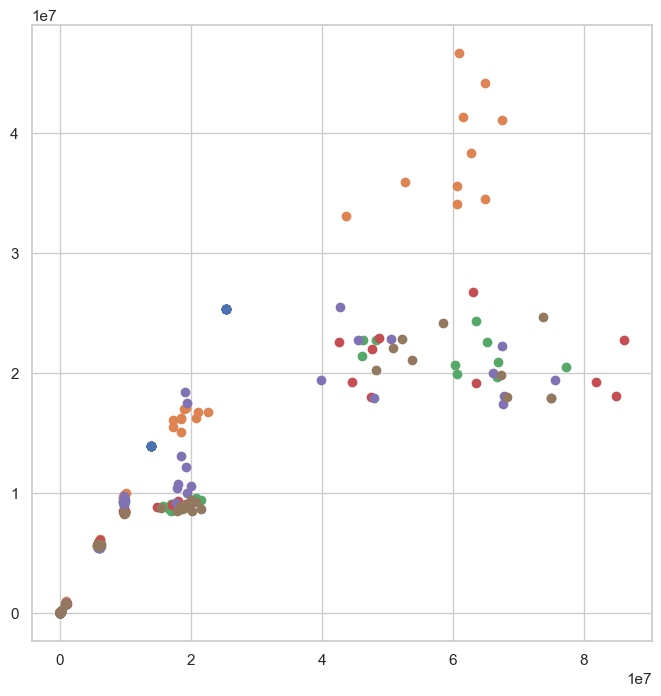

In [174]:
x_runs = [i+1 for i in range(10)]
fig, ax = plt.subplots(figsize = (8, 8))
for a in range(len(methodOrder)):
    if methodOrder[a] != "Heuristic":
        l_start = [item["start_val"] for item in results if item["method"] == methodOrder[a]]
        l_end = [item["f_val"] for item in results if item["method"] == methodOrder[a]]
        ax.scatter(l_start, l_end, label=methodOrder[a])
    #ax.plot(x_runs, l_start, color="green", label="starting", scalex)
    #ax.plot(x_runs, l_end, color="orange", label="finished")
    #ax.set_title(x_names[a])

ax.plot(range(30000000, 90000000), range(30000000, 90000000), linestyle="--")
plt.suptitle("Changes from start to end solution")
plt.legend(loc='lower right', ncols=2)
plt.xticks(np.arange(3000000, 9000000, 100000))
plt.yticks(np.arange(3000000, 9000000, 100000))
plt.ylim([3000000, 9000000])
plt.show()

[5923759, 6170789, 5960227, 5841498, 6071955, 5781995, 6043318, 5871252, 6131376, 5904645, 32764, 32708, 32782, 32659, 32790, 32647, 32636, 32698, 32748, 32850, 1524, 1342, 1360, 1380, 1406, 1330, 1318, 1420, 1376, 1410, 915290, 898036, 893616, 899424, 933908, 923760, 915102, 898008, 882662, 922810, 178326, 180206, 177452, 179702, 176974, 179088, 178594, 178568, 177742, 177984, 21569592, 19128182, 18291550, 18606084, 18504300, 16384916, 19444106, 17504686, 19973782, 18427570, 9696040, 9814740, 9785790, 9736908, 9838866, 9807890, 9727802, 9821840, 9723460, 9917832]
[5801101, 5801101, 5801101, 5801101, 5801101, 5801101, 5801101, 5801101, 5801101, 5801101, 25366272, 25366272, 25366272, 25366272, 25366272, 25366272, 25366272, 25366272, 25366272, 25366272, 32770, 32770, 32770, 32770, 32770, 32770, 32770, 32770, 32770, 32770, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 884948, 884948, 884948, 884948, 884948, 884948, 884948, 884948, 884948, 884948, 180300, 180300, 180300, 1803

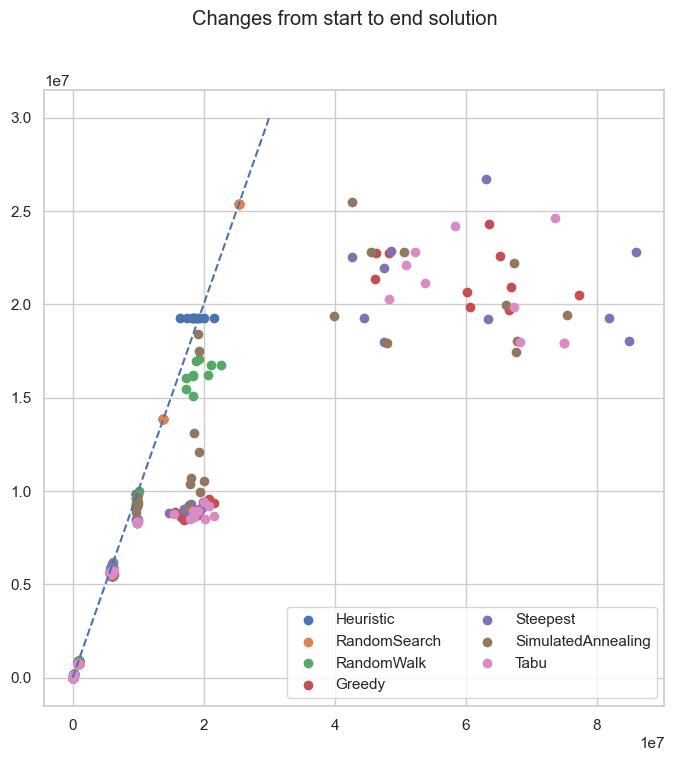

In [170]:
x_runs = [i+1 for i in range(10)]
fig, ax = plt.subplots(figsize = (8, 8))
for a in range(len(methodOrder)):
    l_start = [item["start_val"] for item in results if item["method"] == methodOrder[a] and item["f_val"]<30000000]
    print(l_start)
    l_end = [item["f_val"] for item in results if (item["method"] == methodOrder[a] and item["f_val"]<30000000)]
    ax.scatter(l_start, l_end, label=methodOrder[a])
    #ax.plot(x_runs, l_start, color="green", label="starting", scalex)
    #ax.plot(x_runs, l_end, color="orange", label="finished")
    #ax.set_title(x_names[a])

ax.plot(range(0, 30000000), range(0, 30000000), linestyle="--")
plt.suptitle("Changes from start to end solution")
plt.legend(loc='lower right', ncols=2)
#plt.xticks(np.arange(5500000, 6400000, 100000))
#plt.yticks(np.arange(5500000, 6400000, 100000))
#plt.ylim([5000000, 7000000])
plt.show()

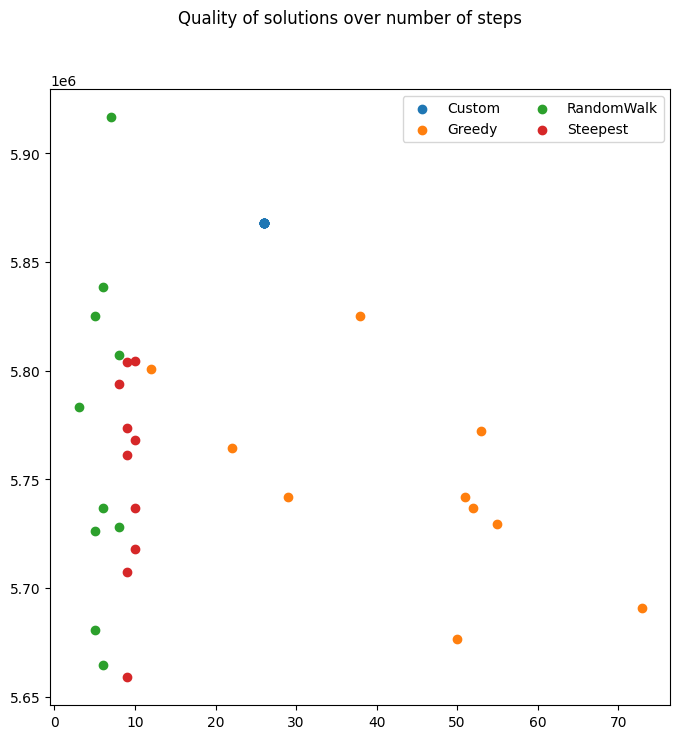

In [131]:
fig, ax = plt.subplots(figsize = (8, 8))
for a in range(len(x_names)):
    if x_names[a] != "RandomSearch":
        l_start = [item["steps"] for item in data if item["method"] == x_names[a]]
        l_end = [item["f_val"] for item in data if item["method"] == x_names[a]]
        ax.scatter(l_start, l_end, label = x_names[a])
    #ax.plot(x_runs, l_start, color="green", label="starting", scalex)
    #ax.plot(x_runs, l_end, color="orange", label="finished")
    #ax.set_title(x_names[a])

#ax.plot(range(5500000, 6400000), range(5500000, 6400000), linestyle="--")
plt.suptitle("Quality of solutions over number of steps")
plt.legend(loc='upper right', ncols=2)
#plt.xticks(np.arange(0, 500, 50))
#plt.yticks(np.arange(5500000, 6400000, 100000))
#plt.ylim([5000000, 7000000])
plt.show()